##   Практика 7: Метод головних компонент  (PCA: Principal Component Analysis) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA             # PCA= Principal Component Analysis
from sklearn.preprocessing import StandardScaler  # шкалювання
import math
from matplotlib.patches import Ellipse

In [2]:
np.set_printoptions(precision=4)  # скрізь округлення до 4го знаку. 

## 1. Приклад 12.2.1 (Rencher)  

In [3]:
data = np.loadtxt("T3_7_SONS.DAT", dtype=float)
print(data)

[[191. 155. 179. 145.]
 [195. 149. 201. 152.]
 [181. 148. 185. 149.]
 [183. 153. 188. 149.]
 [176. 144. 171. 142.]
 [208. 157. 192. 152.]
 [189. 150. 190. 149.]
 [197. 159. 189. 152.]
 [188. 152. 197. 159.]
 [192. 150. 187. 151.]
 [179. 158. 186. 148.]
 [183. 147. 174. 147.]
 [174. 150. 185. 152.]
 [190. 159. 195. 157.]
 [188. 151. 187. 158.]
 [163. 137. 161. 130.]
 [195. 155. 183. 158.]
 [186. 153. 173. 148.]
 [181. 145. 182. 146.]
 [175. 140. 165. 137.]
 [192. 154. 185. 152.]
 [174. 143. 178. 147.]
 [176. 139. 176. 143.]
 [197. 167. 200. 158.]
 [190. 163. 187. 150.]]


 Можна зчитати і як DataFrame: 

In [6]:
Son1 = data[:,:2]
Son2 = data[:, 2:]
Son1_mean = np.mean(Son1, axis=0)
Son2_mean = np.mean(Son2, axis=0)
Son1_cov = np.cov(Son1.T)
Son2_cov = np.cov(Son2.T)
print(Son1_cov)

# Як ще обчислити коваріаційну матрицю: 
cov_mat = np.cov(Son1, rowvar = False) # щоб не транспонувати, можна взяти  rowvar = False
print(cov_mat)

[[95.2933 52.8683]
 [52.8683 54.36  ]]
[[95.2933 52.8683]
 [52.8683 54.36  ]]


Знаходимо власні вектори та власні числа: 

In [9]:
eigen_values , eigen_vectors = np.linalg.eigh(Son1_cov)
a = eigen_vectors   
lam = eigen_values                          

Зауважимо, що за замовчуванням власні числа у зростаючому порядку! 

In [10]:
np.linalg.eigh(Son1_cov)

(array([ 18.135 , 131.5183]),
 array([[ 0.5652, -0.8249],
        [-0.8249, -0.5652]]))

Симетризуємо та записуємо дискримінантні функції. Ми міняємо порядок, оскільки власне число з номером 2 -більше.

In [12]:
Son1_sym = Son1 - Son1_mean
Son2_sym = Son2 - Son2_mean
z1 = Son1_sym @ a[:,1]                        
z2 = Son2_sym @ a[:,0]

Намалюємо обидві картинки: зображення в старих координатах і в нових. Сині точки- це дані в старих координатах, червоні - в нових. Ми бачимо, що в нових координатах картинка ''повернута'' на в напрямку ХОУ. 

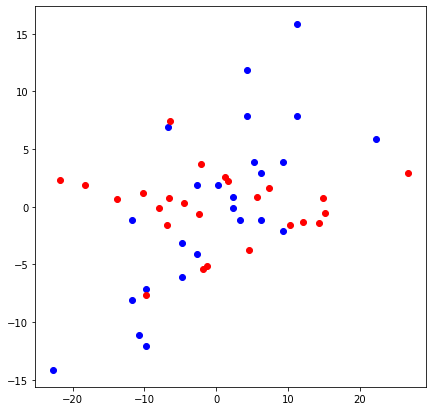

In [29]:
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)

# додаємо точки 
ax0.scatter(Son1_sym[:,0],Son1_sym[:,1],c='blue')  
ax0.scatter(z1,z2,c='red')  

plt.show()

Знайдемо головні оці еліпса $\frac{x^2}{a^2} + \frac{y^2}{b^2} = R^2$, та побудуємо довірчий еліпс з цими головними осями: $a = \sqrt{\lambda_1}$, $b =\sqrt{\lambda_2}$. 

In [17]:
sqr_lam = np.sqrt(lam)

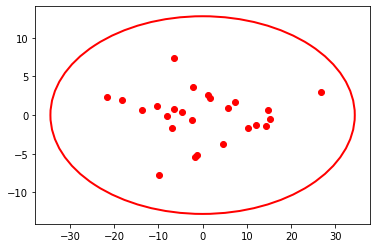

In [36]:
ax0 = fig.add_subplot(111)

ellipse = Ellipse(xy=(0,0), width= 3*2* sqr_lam[1],  height= 3*2* sqr_lam[0], 
                        edgecolor='r', fc='None', lw=2)
fig, ax = plt.subplots()

ax.add_patch(ellipse)  
ax.scatter(z1,z2,c='red')  

ax.autoscale()
plt.show()

## 2. Приклад 12.7 (Rencher)   


В наступній таблиці наведено результати  6 тестів   20 інженерів-студентів та 20 пілотів, див. також https://rpubs.com/aaronsc32/principal-component-analysis}. Ми наведемо перші 6 значень таблиці; тут 1 означає, що мова йде про студента, а 2-про пілота. Тому ми зробимо групування данних за принципом, чи є людина, що бере участь в експерименті, студентом чи пілотом.

In [16]:
data = np.loadtxt("T5_6_PILOT.DAT", dtype=float)
pilot = pd.DataFrame(data[:,:], columns=['GROUP','V1','V2','V3','V4','V5','V6'])
print(pilot)

    GROUP     V1    V2     V3     V4    V5     V6
0     1.0  121.0  22.0   74.0  223.0  54.0  254.0
1     1.0  108.0  30.0   80.0  175.0  40.0  300.0
2     1.0  122.0  49.0   87.0  266.0  41.0  223.0
3     1.0   77.0  37.0   66.0  178.0  80.0  209.0
4     1.0  140.0  35.0   71.0  175.0  38.0  261.0
5     1.0  108.0  37.0   57.0  241.0  59.0  245.0
6     1.0  124.0  39.0   52.0  194.0  72.0  242.0
7     1.0  130.0  34.0   89.0  200.0  85.0  242.0
8     1.0  149.0  55.0   91.0  198.0  50.0  277.0
9     1.0  129.0  38.0   72.0  162.0  47.0  268.0
10    1.0  154.0  37.0   87.0  170.0  60.0  244.0
11    1.0  145.0  33.0   88.0  208.0  51.0  228.0
12    1.0  112.0  40.0   60.0  232.0  29.0  279.0
13    1.0  120.0  39.0   73.0  159.0  39.0  233.0
14    1.0  118.0  21.0   83.0  152.0  88.0  233.0
15    1.0  141.0  42.0   80.0  195.0  36.0  241.0
16    1.0  135.0  49.0   73.0  152.0  42.0  249.0
17    1.0  151.0  37.0   76.0  223.0  74.0  268.0
18    1.0   97.0  46.0   83.0  164.0  31.0  243.0


In [13]:
data.shape

(40, 7)

In [14]:
# pilot_group = pilot.groupby("GROUP", axis=0)      # можна згрупувати

Знайдемо коваріаційну матрицю та її власні числа: 

In [6]:
S = np.cov(data[:,1:], rowvar = False) 
eigen_values , eigen_vectors = np.linalg.eigh(S)  # власні числа у зростаючому порядку! 
a = eigen_vectors                                 # власні вектори 
lam = eigen_values
print(lam)
lam2 = sorted(lam, reverse=True)
print(lam2)
print(a[:,-1]) # власний вектор, який відповідає найбільшому власному числу
print(a)

[  50.3785  128.9051  261.0769  401.4386  878.3578 1722.0424]
[1722.0423839799746, 878.3578310194125, 401.43856237945477, 261.0769331466388, 128.9051485809172, 50.37849986796144]
[-0.2117  0.0388 -0.0801 -0.7755  0.0959 -0.5802]
[[-0.1068 -0.0476  0.0308 -0.8882 -0.3895 -0.2117]
 [ 0.9627 -0.1479 -0.1913 -0.0957 -0.0638  0.0388]
 [ 0.1238  0.9751 -0.1285 -0.0815  0.066  -0.0801]
 [ 0.063  -0.1089  0.0813 -0.0807  0.608  -0.7755]
 [ 0.2031  0.1092  0.9681 -0.0149 -0.0105  0.0959]
 [ 0.0357  0.0364  0.0452  0.4343 -0.6857 -0.5802]]


Ці власні вектори нормовані: 

In [7]:
round(np.linalg.norm(a[:,-1]),3)   # нормовані

1.0

Відносна частка власних чисел серед всіх: 

In [8]:
x = []
for l in lam: 
    x = np.append(x,l/sum(lam))
x_sorted = sorted(np.round(x,3),reverse=True)
print(x_sorted)

[0.5, 0.255, 0.117, 0.076, 0.037, 0.015]


Побудуємо scree-plot: 

In [47]:
c = [i+1 for i  in range(6)]
c

[1, 2, 3, 4, 5, 6]

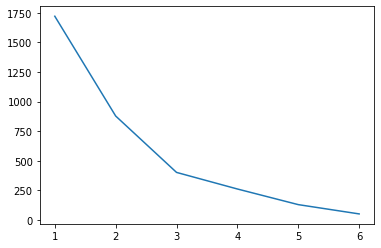

In [52]:
plt.plot(c, lam2)
plt.show()

В принципі, перших 2х власних чисел досить, вони несуть 75% інформації (перевіримо далі).  

Виконаємо тепер аналіз за допомогою вбудованої функції. 

In [11]:
pca = PCA()
pca.fit(data[:,1:])

print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[ 0.2117 -0.0388  0.0801  0.7755 -0.0959  0.5802]
 [-0.3895 -0.0638  0.066   0.608  -0.0105 -0.6857]
 [-0.8882 -0.0957 -0.0815 -0.0807 -0.0149  0.4343]
 [ 0.0308 -0.1913 -0.1285  0.0813  0.9681  0.0452]
 [ 0.0476  0.1479 -0.9751  0.1089 -0.1092 -0.0364]
 [-0.1068  0.9627  0.1238  0.063   0.2031  0.0357]]
[1722.0424  878.3578  401.4386  261.0769  128.9051   50.3785]
[0.5003 0.2552 0.1166 0.0758 0.0374 0.0146]


In [12]:
x = np.array([0]*6, dtype = float)
y = 0
ratio =  pca.explained_variance_ratio_
for i in range(0,6):  
    y += ratio[i]
    x[i]= y
print(x)   # 2 перших власних числа складають 75% інформації

[0.5003 0.7554 0.8721 0.9479 0.9854 1.    ]


Перетворимо тепер дані, а саме, запишемо дані в нових координатах). 

In [13]:
PC_data = pca.fit_transform(data[:,1:])
print(PC_data[:,0])    

[ -1.9283 -13.7027  14.8853 -75.9665 -30.281    1.6336 -34.8959 -27.0611
  -1.5811 -39.5294 -41.9651 -22.5842  18.2292 -63.259  -72.3117 -25.5215
 -56.9058  10.203  -57.1504 -24.4924   5.2969   8.8987  59.7344  85.391
  19.1112 -30.4688  45.5902  36.5728  36.7169  58.1848  45.2836  27.1989
 -44.4279   2.3     41.8552  72.7     63.2639   2.4989  21.3537 -12.8698]


Як це зробити вручну. Спочатку треба центрувати дані, т.б. взяти   $(y - \bar{y})/ \sqrt{\sigma^2}$, і потім вже ці дані записати в нових координатах.  З точністю до знаку, отримаємо PC_data[:,0]. 

In [14]:
data_centr = data[:,1:] - np.mean(data[:,1:], axis =0)

# тип має бути дійсний, інакше це цілий
data_norm = np.array([[0]*len(lam) for _ in range(len(data_centr))], dtype=float)  

for j in range(len(lam)):
    for i in range(len(data_centr)): 
        data_norm[i,j] = np.round(data_centr[i,j]/ math.sqrt(lam2[j]), 3)
# print(data_norm)
Z1 = a[:,-1]
Z2 = a[:,-2]
PC_1 = data_centr @ Z1
PC_2 = data_centr @ Z2
print(PC_1)  # це те саме, що рахує pca.fit_transform

[  1.9283  13.7027 -14.8853  75.9665  30.281   -1.6336  34.8959  27.0611
   1.5811  39.5294  41.9651  22.5842 -18.2292  63.259   72.3117  25.5215
  56.9058 -10.203   57.1504  24.4924  -5.2969  -8.8987 -59.7344 -85.391
 -19.1112  30.4688 -45.5902 -36.5728 -36.7169 -58.1848 -45.2836 -27.1989
  44.4279  -2.3    -41.8552 -72.7    -63.2639  -2.4989 -21.3537  12.8698]


In [15]:
PC = pd.DataFrame(PC_2,PC_1)
print(PC.head())   # те саме

                    0
 1.928284   15.328181
 13.702685 -40.298968
-14.885349  61.608587
 75.966463  34.205669
 30.280972 -26.913875


Графічне зображення в цих нових координатах. Точки різних груп зобажені різним кольором. 

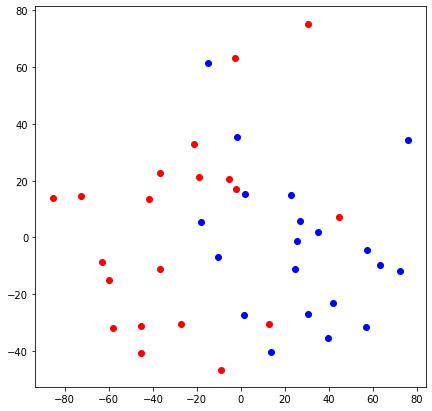

In [17]:
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)

# додаємо точки   
ax0.scatter(PC_1[:20],PC_2[:20],c='blue')  
ax0.scatter(PC_1[20:40],PC_2[20:40],c='red')  
#ax0.scatter(PC_1[20:30],PC_2[20:30],c='green')  
#ax0.scatter(PC_1[30:40],PC_2[30:40],c='black')  


plt.show() 